# Flanker Task Plots

## Test 1

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# MindLogger exported Flanker csv table with test data:
base_dir = '/Users/arno/Software/mindlogger-time-tests/'
csv_file = base_dir + 'input/flanker_test_20220405/624789f25197b9338bdb113c_test1.csv'
columns = ['block_number','trial_number','trial_type','event_type','experiment_start_timestamp',
           'block_start_timestamp','trial_start_timestamp','event_start_timestamp',
           'video_display_request_timestamp','response_touch_timestamp','trial_offset','event_offset',
           'response_time','response','response_accuracy']
df = pd.read_csv(csv_file, usecols=columns)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Movie of the Flanker task test 1 block of trials:
# Convert movie and add frame numbers:
## ffmpeg -i /Users/arno.klein/Downloads/flanker_test_20220405.MOV -vf "drawtext=fontfile=Arial.ttf: text='%{frame_num}': fontsize=200: start_number=1: x=(w-tw)/2: y=h-(2*lh): fontcolor=black: fontsize=20: box=1: boxcolor=white: boxborderw=5" -c:a copy /Users/arno/Downloads/flanker_test_frames.mp4fps = 240.
fps = 240.

# Excel table with test data frame numbers:
csv_file2 = base_dir + 'input/flanker_test_20220405/624789f25197b9338bdb113c_test1_frames.csv'
df2 = pd.read_csv(csv_file2, usecols=['frame'])
frames = df2.frame
frame_times = np.array([x * 1000 / fps for x in frames])

In [78]:
response_to_fixation = pd.Series(np.zeros(len(frames)))
fixation_to_stimulus = pd.Series(np.zeros(len(frames)))
i = 0
for frame in frames:
    i = i + 1
    if i > 1:
        if i % 3 == 1:
            response_to_fixation[i-1] = (frame - frames[i-2]) * 1000 / fps
        else:
            response_to_fixation[i-1] = np.nan
        if i % 3 == 2:
            fixation_to_stimulus[i-1] = (frame - frames[i-2]) * 1000 / fps
        else:
            fixation_to_stimulus[i-1] = np.nan

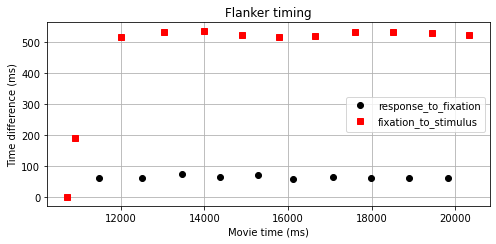

In [81]:
max_i = 34
plt.plot(frame_times[0:max_i], response_to_fixation[0:max_i], marker='o', linestyle='', color='k', label='response_to_fixation')
plt.plot(frame_times[0:max_i], fixation_to_stimulus[0:max_i], marker='s', linestyle='', color='r', label='fixation_to_stimulus')
plt.title('Flanker timing')
plt.xlabel ('Movie time (ms)')
plt.ylabel ('Time difference (ms)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#print("Contents in csv file:\n", df)
print(df.trial_start_timestamp)
print(df.event_start_timestamp)
print(df.video_display_request_timestamp)
print(df.response_touch_timestamp)